In [23]:
import os
import pickle
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from P02_MSIE.T06_exp.vrptw_v9 import VRPTW

CURRENT_DIR = os.getcwd()
print(f"Current Directory: {CURRENT_DIR}")
datetime_now = datetime.now().strftime("%Y%m%d_%H%M%S")
os.makedirs(f"{CURRENT_DIR}/_tmp", exist_ok=True)


Current Directory: c:\Users\admin\Coding\research\rl-meta-test\src\P02_MSIE\T07_exp


In [24]:
# folder = "R_20251113_141120"
# it = 32262

# folder = "R_20251113_142411"
# it = 28417

folder = "R_20251113_143720"
it = 11464

In [25]:
with open(f"./save_models/{folder}/exp_{it:05d}.pkl", "rb") as f:
    exp = pickle.load(f)
exp.tail()

,action,reward,done,F,CR,MG,best_solution,convergence_rate,std_pop,total_iteration,best_trial_fitness,std_trial_fitness,patience_ratio,idx_iteration,patience_remaining,TimeLimit.truncated
225,"[0.9964149356770515, 0.02540761298567057, 0.16...",0.000023,False,0.996415,0.025408,0.168896,0.497844,1.0,0.444972,2260,0.577446,0.415341,0.125,2259,50,False
226,"[0.9799764370578528, 0.4697543657627702, 0.716...",0.000014,False,0.979976,0.469754,0.716620,0.497844,1.0,0.383851,2270,1.454168,0.128032,0.100,2269,40,False
227,"[0.9873111324822903, 0.01223362811535597, 0.30...",0.000009,False,0.987311,0.012234,0.309605,0.497844,1.0,0.460901,2280,0.497844,0.462023,0.075,2279,30,False
228,"[0.998551979240179, 0.04596495998620988, 0.038...",0.000005,False,0.998552,0.045965,0.038249,0.497844,1.0,0.433968,2290,0.497844,0.438428,0.050,2289,20,False
229,"[0.8878759629416466, 0.021820283708870413, 0.9...",0.000003,False,0.887876,0.021820,0.923927,0.497844,1.0,0.392268,2300,0.497844,0.404418,0.025,2299,10,False


In [26]:
with open(f"./save_models/{folder}/vrp_{it:05d}.pkl", "rb") as f:
    info = pickle.load(f)

global_solution_history = info["global_solution_history"]
population = info["population"]
fitness_trial_history = info["fitness_trial_history"]
vrptw = info["vrptw"]
episode_reward = info["episode_reward"]
episode_length = info["episode_length"]
best_solution = info["best_solution"]
print(f"Episode Reward: {episode_reward}, Episode Length: {episode_length}, Best Solution: {best_solution}")

Episode Reward: 4583.12326, Episode Length: 231, Best Solution: 0.4978439541362399


Best global solution: 0.4978439541362399


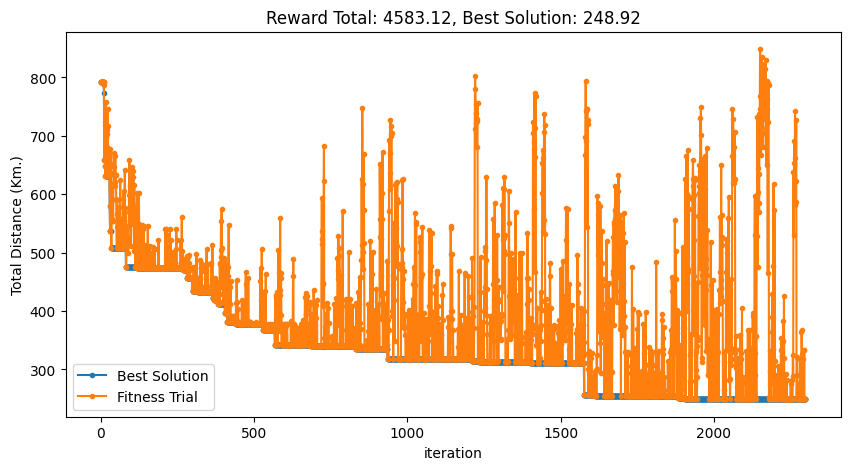

In [27]:
print(f"Best global solution: {min(global_solution_history)}")
# Plot results
fig, ax = plt.subplots(1, figsize=(10, 5))
x = np.arange(len(global_solution_history))
y1 = np.array(global_solution_history) * vrptw.solution_scale_factor
y2 = np.array(fitness_trial_history) * vrptw.solution_scale_factor
ax.plot(x, y1, marker=".", label="Best Solution")
ax.plot(x, y2, marker=".", label="Fitness Trial")
ax.set(
    xlabel="iteration",
    ylabel="Total Distance (Km.)",
    title=f"Reward Total: {episode_reward:.2f}, Best Solution: {best_solution*vrptw.solution_scale_factor:.2f}",
)
ax.legend()
fig.savefig(f"{CURRENT_DIR}/_tmp/plot_{datetime_now}_{it:05d}.png",
    dpi=300,
)


In [28]:
current_cost = [vrptw.objective_func(p) for p in population]
idx_min = np.argmin(current_cost)
print(current_cost[idx_min])

248.92197706811993


[0.23185582 0.20949165 0.04410036 0.99256169 0.03832784 0.92798269
 0.1089946  0.14615267 0.8706882  0.69143147 0.72235682 0.47436759
 0.3313002  0.43541761 0.38689139 0.41150931 0.33197167 0.34531058
 0.36902387 0.25474998 0.32417389 0.57363462 0.57143029 0.52216127
 0.56117636 0.60656557 0.58088417 0.49968917 0.84206561 0.58523476
 0.84243392 0.48505275 0.33039982 0.7476015  0.39077443 0.86068288
 1.         0.35494508 0.78895136 0.58155698 0.80986975 0.26632463
 0.         0.62275842 0.51637899 0.35255432 0.38297053 0.54032114
 0.25247084 0.62171025]


<Axes: >

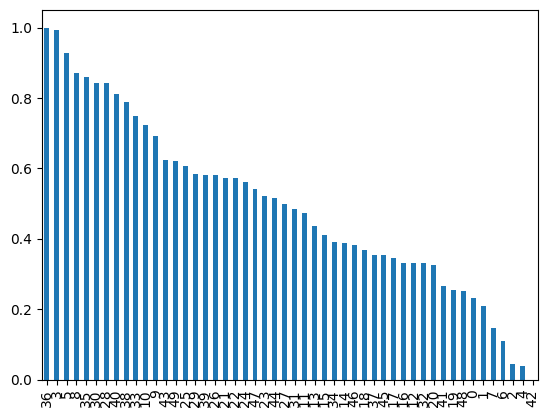

In [29]:
# How to visualize population
best_individual = population[idx_min]
print(best_individual)
pd.Series(best_individual).sort_values(ascending=False).plot.bar()

In [30]:
vrptw.objective_func(population[idx_min])

248.92197706811993

In [31]:
exp.columns

Index(['action', 'reward', 'done', 'F', 'CR', 'MG', 'best_solution',
       'convergence_rate', 'std_pop', 'total_iteration', 'best_trial_fitness',
       'std_trial_fitness', 'patience_ratio', 'idx_iteration',
       'patience_remaining', 'TimeLimit.truncated'],
      dtype='object')

<Axes: >

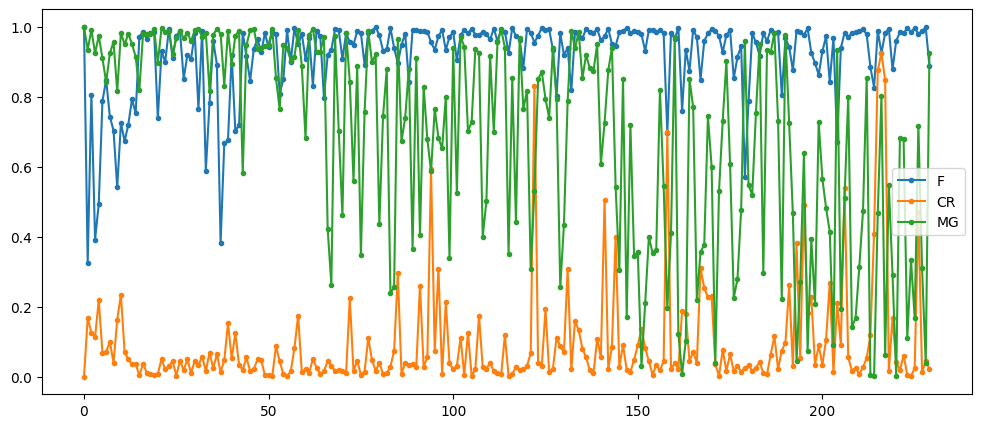

In [32]:
exp[["F", "CR", "MG"]].plot(figsize=(12,5), marker=".")